### Using the machine learning algorithm: Decision Tree, and the  S1_Originaldata.csv database with cells into neoplastic astrocytes from the periphery, i.e., infiltrating neoplastic cells, and the tumor core, evaluate the performance of the classification with:

**Part II**

a) Apply some technique to solve the class imbalance problem present in 
the database, and evaluate the performance 

b) Discuss the results obtained (different metrics) 

In [1]:
#Standard
import pandas as pd
import numpy as np

#Visualizers
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from yellowbrick.classifier import ConfusionMatrix

#Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#Metrics Additional
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import log_loss
from sklearn.metrics import zero_one_loss
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import roc_auc_score

#Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

#Models
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier #Model I will be using today
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier

#Feature Selection
import lightgbm as lgb

#Sampling
from sklearn.utils import resample

#Tuning
from sklearn.model_selection import GridSearchCV

#Others
import warnings
warnings.filterwarnings('ignore')


### EDA

In [2]:
df = pd.read_csv('/content/S1_Originaldata.csv')

In [3]:
df.head(5)

,class,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,...,PPP1R2P3,PPP1R2P9,PPP1R32,PPP1R35,PPP1R36,PPP1R37,PPP1R3A,PPP1R3B,PPP1R3C,PPP1R3D
0,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
1,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,1.487372,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
2,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,3.812781,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
3,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0
4,Neoplastic_Core,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0,...,0.000000,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0


In [4]:
#444 rows and 16384 columns

df.shape  

(444, 16384)

In [5]:
df.describe()

,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,PPP1R2P3,PPP1R2P9,PPP1R32,PPP1R35,PPP1R36,PPP1R37,PPP1R3A,PPP1R3B,PPP1R3C,PPP1R3D
count,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.000000,444.0,444.000000,...,444.000000,444.0,444.000000,444.000000,444.000000,444.000000,444.0,444.000000,444.000000,444.000000
mean,0.281286,1.300646,0.218221,0.043053,0.169951,0.966699,0.308724,0.034910,0.0,0.019368,...,0.129347,0.0,0.186652,1.500870,0.168991,0.059058,0.0,0.274012,0.578264,0.138385
std,1.448833,2.474125,1.103586,0.567969,1.023480,2.856530,1.524655,0.468207,0.0,0.342199,...,0.482201,0.0,1.083458,2.676177,1.034354,0.502183,0.0,1.252474,2.071382,0.950394
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.0,0.000000,2.762115,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
max,9.515390,9.235368,8.587576,8.715006,9.315997,14.432504,9.786054,7.939351,0.0,7.044394,...,3.053072,0.0,8.149755,10.759567,8.607547,7.653209,0.0,10.029919,11.223894,9.566267


In [6]:
df.isna().sum()

class          0
1/2-SBSRNA4    0
A1BG           0
A1BG-AS1       0
A1CF           0
              ..
PPP1R37        0
PPP1R3A        0
PPP1R3B        0
PPP1R3C        0
PPP1R3D        0
Length: 16384, dtype: int64

In [7]:
#Counts of classes in data. 

df['class'].value_counts()

Neoplastic_Core         386
Neoplastic_Periphery     58
Name: class, dtype: int64

In [8]:
#Neoplastic_Core is alot more, consisting of 86.94% of the data

df['class'].value_counts(normalize=True)*100

Neoplastic_Core         86.936937
Neoplastic_Periphery    13.063063
Name: class, dtype: float64

Rows, Columns: (444, 16384)


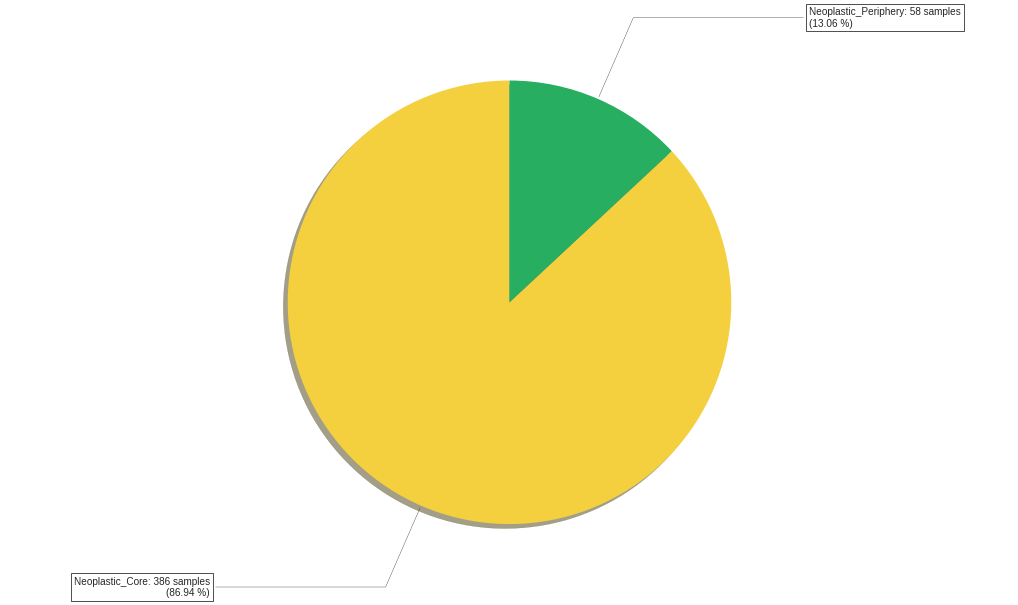

In [9]:
print("Rows, Columns:",df.shape)
Classes = df.groupby('class').size()
labels = Classes.index.values
sizes = Classes.values
muestra = []
for k in range(0,labels.size):
  texto = labels[k]+': '+str(sizes[k])+' samples\n({:,.2f} %)'.format((100*sizes[k]/sum(sizes)))
  muestra.append(texto)
colors = ['#F4D03F','#27AE60']
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),bbox=bbox_props, zorder=0, va="center")
fig,ax1 = plt.subplots(figsize=(18,9),ncols=1,nrows=1)
wedges, texts = ax1.pie(sizes, shadow=True, colors=colors, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax1.annotate(muestra[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)
plt.show()

### Data Split/Transform and Feature Selection

In [11]:
X = df.drop(['class'], axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42, stratify=y)

#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(355, 16383)
(355,)
(89, 16383)
(89,)


In [12]:
# Feature importance 

feature_importances = np.zeros(X_train.shape[1])

model = lgb.LGBMClassifier()
model.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_test, y_test)], verbose = 200)
    
# Record the feature importances
feature_importances += model.feature_importances_

# Top features
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances.head(10)

# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail(100)

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[48]	valid_0's binary_logloss: 0.112143
There are 16096 features with 0.0 importance


,feature,importance
5500,ELMOD1,0.0
5501,ELMOD2,0.0
5502,ELMOD3,0.0
5503,ELN,0.0
5504,ELOF1,0.0
...,...,...
5532,EML4,0.0
5533,EML5,0.0
5534,EML6,0.0
5535,EMP1,0.0


In [13]:
# Drop the unimportant features

X_train = X_train.drop(columns = zero_features)
X_test = X_test.drop(columns = zero_features)

print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)

#Fit the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training shape:  (355, 287)
Testing shape:  (89, 287)


### Decision Tree Before Resampling

In [15]:
tree = DecisionTreeClassifier() 
tree.fit(X_train, y_train)

print(f'Decision tree has {tree.tree_.node_count} nodes with maximum depth {tree.tree_.max_depth}.') 
print(f'Model Accuracy: {tree.score(X_train, y_train)}')

Decision tree has 23 nodes with maximum depth 8.
Model Accuracy: 1.0


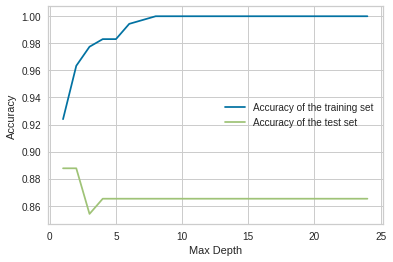

In [16]:
neighbors_setting = range(1,25)

training_accuracy = []
test_accuracy = []

max_dep = range(1,25)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

In [17]:
#Classification Report

y_pred = tree.predict(X_test) 
print(classification_report(y_test,y_pred))

                      precision    recall  f1-score   support

     Neoplastic_Core       0.91      0.94      0.92        77
Neoplastic_Periphery       0.50      0.42      0.45        12

            accuracy                           0.87        89
           macro avg       0.71      0.68      0.69        89
        weighted avg       0.86      0.87      0.86        89



In [18]:
#Accuracy Score:
score_tree = accuracy_score(y_test, y_pred)*100
print("Accuracy score: %0.3f" % score_tree)

Accuracy score: 86.517


In [23]:
#Other Metrics
classifiers=[DecisionTreeClassifier()]

model = tree

def classifier_metrics():    
    def metrics(model):
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()

classifier_metrics()

DecisionTreeClassifier()
cohen_kappa_score: 0.378
log_loss: 4.657
zero_one_loss: 0.135
hemming_loss: 0.135
matthews_corrcoef: 0.380



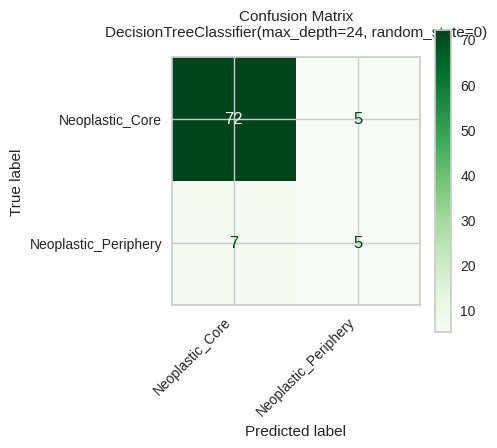

In [19]:
#Confusion Matrix

def show_confusion_matrix(model, X_test, y_test):
    class_names = model.classes_
    fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
    ax.grid = False
    plt.rcParams.update({'font.size': 12})
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None,
                                 ax=ax)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, ha='right')
    disp.ax_.set_title(f'Confusion Matrix\n{model}', size=11, y=1.05)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

show_confusion_matrix(tree, X_test, y_test)

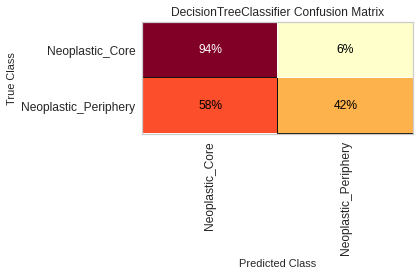

In [24]:
classes = ["Neoplastic_Core", "Neoplastic_Periphery"]
model = tree

def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)

CM_viz()

### Resample

Because there is 386 samples of Neoplastic_Core vs 58 samples of Neoplastic_Periphery, there is an imbalance problem and we will need to resample the data

In [26]:
df_resample = pd.read_csv('/content/S1_Originaldata.csv')

In [27]:
df_class1 = resample(df_resample[df_resample['class']=='Neoplastic_Core'],
               replace=True,
               n_samples=386,
               random_state=123)

df_class2 = resample(df_resample[df_resample['class']=='Neoplastic_Periphery'],
               replace=True,
               n_samples=386,
               random_state=123)

df_resample= pd.concat([df_class1, df_class2])
df_resample['class'].value_counts()

Neoplastic_Core         386
Neoplastic_Periphery    386
Name: class, dtype: int64

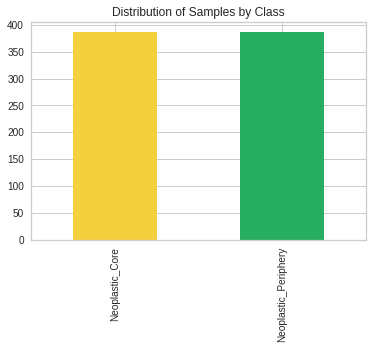

In [28]:
df_resample['class'].value_counts().plot(kind='bar', 
color = ['#F4D03F','#27AE60'], title='Distribution of Samples by Class');

### Resample Data Split/Transform and Feature Selection

In [32]:
X_resample = df_resample.drop(['class'], axis=1)
y_resample = df_resample['class']

In [33]:
# Splitting the dataset to Train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_resample, y_resample, test_size= 0.2, random_state= 42, stratify=y)

#to know the shape of the train and test dataset.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(617, 16383)
(617,)
(155, 16383)
(155,)


In [34]:
# Feature importance 

feature_importances = np.zeros(X_train.shape[1])

model = lgb.LGBMClassifier()
model.fit(X_train, y_train, early_stopping_rounds=100, eval_set = [(X_test, y_test)], verbose = 200)
    
# Record the feature importances
feature_importances += model.feature_importances_

# Top features
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(X_train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances.head(10)

# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail(100)

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[95]	valid_0's binary_logloss: 0.0163836
There are 15405 features with 0.0 importance


,feature,importance
5712,ESX1,0.0
5713,ESYT1,0.0
5714,ESYT2,0.0
5715,ESYT3,0.0
5716,ETAA1,0.0
...,...,...
5748,EXD3,0.0
5749,EXO1,0.0
5750,EXOC1,0.0
5751,EXOC2,0.0


In [35]:
# Drop the unimportant features

X_train = X_train.drop(columns = zero_features)
X_test = X_test.drop(columns = zero_features)

print('Training shape: ', X_train.shape)
print('Testing shape: ', X_test.shape)

#Fit the data
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Training shape:  (617, 978)
Testing shape:  (155, 978)


### Decision Tree After Resample

In [36]:
tree_resample = DecisionTreeClassifier() 
tree_resample.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
print(f'Decision tree has {tree_resample .tree_.node_count} nodes with maximum depth {tree_resample .tree_.max_depth}.') 
print(f'Model Accuracy: {tree_resample .score(X_train, y_train)}')

Decision tree has 23 nodes with maximum depth 7.
Model Accuracy: 1.0


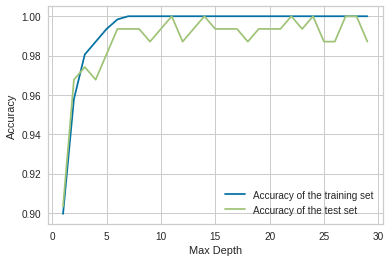

In [46]:
neighbors_setting = range(1,30)

training_accuracy = []
test_accuracy = []

max_dep = range(1,30)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.plot(neighbors_setting,test_accuracy, label='Accuracy of the test set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()

### Accuracy, CM and Classification Report After Resample

In [45]:
#Classification Report

y_pred_resample = tree_resample.predict(X_test) 
print(classification_report(y_test,y_pred_resample))

                      precision    recall  f1-score   support

     Neoplastic_Core       1.00      0.99      0.99        78
Neoplastic_Periphery       0.99      1.00      0.99        77

            accuracy                           0.99       155
           macro avg       0.99      0.99      0.99       155
        weighted avg       0.99      0.99      0.99       155



In [47]:
#Accuracy Score:
score_tree_resample = accuracy_score(y_test, y_pred_resample)*100
print("Accuracy score: %0.3f" % score_tree_resample)


Accuracy score: 99.355


In [52]:
#Other Metrics
classifiers=[DecisionTreeClassifier()]

model = tree_resample

def classifier_metrics():    
    def metrics(model):
        model.fit(X_train, y_train)  
        y_pred = model.predict(X_test)
        try: 
            y_prob = model.predict_proba(X_test)
            log_metric = log_loss(y_test,y_prob)
        except:
            y_prob = "Not probablistic"
            log_metric = 0
        else:
            y_pred_resample = model.predict(X_test)
        c_k_s=cohen_kappa_score(y_test,y_pred)
        zero_met=zero_one_loss(y_test,y_pred)
        hl=hamming_loss(y_test,y_pred)
        mc=matthews_corrcoef(y_test,y_pred)
        print('cohen_kappa_score: {0:.3f}'.format(c_k_s))
        print('log_loss: {0:.3f}'.format(log_metric))
        print('zero_one_loss: {0:.3f}'.format(zero_met))
        print('hemming_loss: {0:.3f}'.format(hl))
        print('matthews_corrcoef: {0:.3f}'.format(mc))
    for name in classifiers:
        print (str(name))
        metrics(name)
        print()

classifier_metrics()

DecisionTreeClassifier()
cohen_kappa_score: 0.987
log_loss: 0.223
zero_one_loss: 0.006
hemming_loss: 0.006
matthews_corrcoef: 0.987



In [55]:
#Crosstab

xtab_TREE=pd.crosstab(y_test, tree_resample.predict(X_test), rownames=['True'], colnames=['Predicted'], margins=True)
display(xtab_TREE)

Predicted,Neoplastic_Core,Neoplastic_Periphery,All
True,,,
Neoplastic_Core,77,1,78
Neoplastic_Periphery,0,77,77
All,77,78,155


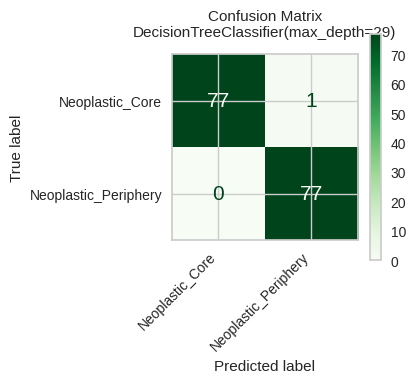

In [49]:
#Confusion Matrix

def show_confusion_matrix(model, X_test, y_test):
    class_names = model.classes_
    fig, ax = plt.subplots(figsize=(3, 3), dpi=100)
    ax.grid = False
    plt.rcParams.update({'font.size': 15})
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Greens,
                                 normalize=None,
                                 ax=ax)
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, ha='right')
    disp.ax_.set_title(f'Confusion Matrix\n{model}', size=11, y=1.05)
    ax.tick_params(axis='both', which='major', labelsize=10)
    plt.show();

show_confusion_matrix(tree_resample, X_test, y_test)

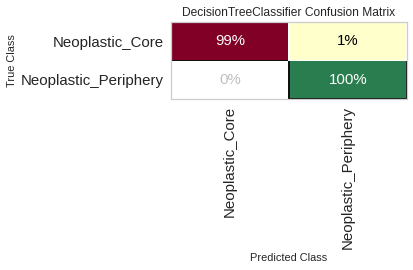

In [56]:
classes = ["Neoplastic_Core", "Neoplastic_Periphery"]
model = tree_resample

def CM_viz():    
    def CM(model,classes):
        visualizer = ConfusionMatrix(model, classes=classes, percent=True)
        visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data 
        return visualizer.poof()  
    for name in classifiers:
        ax = plt.subplot(1,1,1)
        CM(name,classes)

CM_viz()

# Summary

#### The model is begin with EDA. In the EDA phase, I discovered there are 16383 feature columns. I applied feature importance and feature selection to narrow down to 287 feature columns. For this dataset, it's possible to check for high collinearity first before the feature selection process, but I don't think it's necessary given we will resample the data set later.

#### The first desicion tree model w/o resample have Decision tree has 23 nodes with maximum depth 8 with a accuracy score of 87%. The score is good. The model is able to identified 72 true positive or at 94%, but the false positive is 7 or at 58%, which is not a low number. 

#### The Cohen Kappa Score is 0.378. The cks is metric for evaluating multi-class classifiers on imbalanced datasets. Generally closer the score is to one, better the classifier. In this case, 0.378 is on a mid-low end. MCC or Mathews Correlation Coefficient is 0.380, a coefficient of +1 represents a perfect prediction, 0 is similar to a random prediction and −1 indicates an inverse prediction. In this case, it's more of toward random prediciton.

#### The dataset has an imbalance problem, so I resample the data. After **data resample** and feature selection, the dataset is narrow down to 978 features. I used {'max_depth': 7, 'max_leaf_nodes': 23, 'min_samples_leaf': 2} to the second model. The prediction accuracy score is higher at 99%. Also, the second model identified 77 true positive or at 99%. The false positive is 0 or at 0%. Cohen kappa score is 0.987 and MCC is .987, which is much better than the first model. 

#### My final thought is that resample the data definitely help with the model accuracy. **However**, the model score seems **too good to be true**. This may be an **overfitting** issue after the data is resampled. 